## Gene Expression Analysis using Python

This notebook will show the implementation of artificial neural network for cancer gene expression classification.
Before passing the data throguh neural network we will use Principal Component Analysis to reduce dimensionality.

#### Dataset for this project comes from: https://www.kaggle.com/crawford/gene-expression

#### First we will import the nesscecary libraries for reading processing our dataset

In [1]:
import os #IO functions
import pandas as pd # data preprocessing
import numpy as np # linear algebra
import plotly.plotly as py # data visualization

### Content of our dataset (description from Kaggle)

Golub et al "Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene Expression Monitoring"

There are two datasets containing the initial (training, 38 samples) and independent (test, 34 samples) datasets used in the paper. These datasets contain measurements corresponding to ALL and AML samples from Bone Marrow and Peripheral Blood. Intensity values have been re-scaled such that overall intensities for each chip are equivalent.

In [2]:
MAIN_DIR = os.getcwd()

X_df = pd.read_csv(os.path.join(MAIN_DIR, 'data_set_ALL_AML_train.csv'), encoding = 'utf-8')
y_data = pd.read_csv(os.path.join(MAIN_DIR,'actual.csv'))

print(f'Shape of X data: {X_df.shape}')
print(f'Shape of y data: {y_data.shape}')

X_df.head()

Shape of X data: (7129, 78)
Shape of y data: (72, 2)


,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


### Data preprocessing 

First thing we have to do before implementing the PCA algorithm is to prepare our dataset.
PCA requires from us to pass it only a numeric matrix. So in order to create it we have to
delete all the unnesscecary columns from it.

#### Analysis steps:
        
        1. Transpose dataframe so that each row is a patient and each column is a gene
        2. Remove the Gene Description and Accesion Number 
        3. Remove "call column"
        4. Reset index


#### 1. Transpose the dataframe

In [3]:
X_df = X_df.T

print(f'Shape of X transposed data: {X_df.shape}')
X_df.head()

Shape of X transposed data: (78, 7129)


,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
call,A,A,A,A,A,A,A,A,A,A,...,A,A,A,P,A,A,A,A,A,A
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14


#### 2. We will drop the first two rows of our dataset since they do not provide any information helping us with our classification task

In [4]:
X_df = X_df.iloc[2:,:]
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
call,A,A,A,A,A,A,A,A,A,A,...,A,A,A,P,A,A,A,A,A,A
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
call.1,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


#### 3. Next we will drop all the rows with 'call' header since its useless for us

In [5]:
X_df = X_df.drop([index for index, row in X_df.iterrows() if "call" in index])
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


 Now we will separate category from input data

#### 4. Reset index in dataframe

In [6]:
X_df.reset_index(drop=True, inplace=True)
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [7]:
print(f'Shape of our processed data: {X_df.shape}')

X_df.describe()

Shape of our processed data: (38, 7129)


,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
count,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
unique,35,35,35,37,38,36,37,38,34,36,...,33,38,36,38,36,38,37,31,36,36
top,-81,-114,-1,132,-407,-284,-31,-194,206,350,...,103,1215,57,255,-22,987,295,26,246,-22
freq,2,2,2,2,1,2,2,1,2,2,...,2,1,3,1,2,1,2,2,2,2


### Fantastic, now we are ready for implementing our PCA

#### Principal Component Analysis 


    1. Standarize the d-dimensional data using formula

$$s= \frac {value - mean}{std}$$ 

    2. Eigendecomposition - get eigenvectors and eigenvalues
        - using correlation/covariance matrix, the covariance 
          between two features is defined as follows:
        
\begin{equation*}
\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij} - \bar{x_j})(x_{ik} -\bar{x_k})
\end{equation*}

        This can be summarized via the following equation:
        
\begin{equation*}
\sigma_{jk} = \frac{1}{n-1}((X - \bar{x})^T(X - \bar{x}))
\end{equation*}
        
        Where mean vector is:
\begin{equation*} \bar{x} = \sum_{k=1}^n x_i \end{equation*}

        The mean vector is a d-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.
        
        - using Singular Value Decomposition
        
    3. Sort eigenvalues in decreasing order then
       take the k eigenvectors coreesponding to
       the k highest eigenvalues.
       k - number of dimensions of our subspace
       
    4. Create the projection matrix W from k eigenvectors
    
    5. Transform the original d-dimensional data with projection
       matrix W in order to get subspace representation of our data
       

In [8]:
from sklearn.preprocessing import StandardScaler 


class Principal_Component_Analysis:
    
    def __init__(self, X):
        
        """
        Description:
            Constructor of PCA 

        Arguments:
            X - data to be processed

        Returns:
            Nothing, only sets the parameters for the given object.
        """

        self.X = X.astype(float) # data
        self.scaler = StandardScaler() # standarization
        self.explainde_variance = None

    def standarize(self):
        
        """
        Description:
            Method for data standarization, in this case
            we use Standard Scaler object from scikit-learn library

        Returns:
            Scaled X data.
        """
        
        return self.scaler.fit_transform(self.X)
    
    def create_covariance_matrix(self, X_scaled):
        
        """
        Description:
            This methods uses scaled data to create covariance matrix

        Arguments:
            X_scaled - standarized data

        Returns:
            Covariance matrix
        """

        mean_vec = np.mean(X_scaled, axis=0)
        covariance_matrix = (X_scaled - mean_vec).T.dot((X_scaled - mean_vec)) / (X_scaled.shape[0]-1)

        print(f'The covariance matrix: \n {covariance_matrix}')

        return covariance_matrix
    
    def eigendecomposion(self, covariance_matrix):

        """
        Description:
            This methods calculates the eigenvectors and eigenvalue from covariance matrix
            next it sorts the eigenvector and eigenvalues pairs in descending order.

        Arguments:
            covariance_matrix 

        Returns:
            List of eigenvectors and eigenvalues pairs in descending order

        """

        eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
        
        return eig_vals, eig_vecs
    


    def pair_eigen(self, eig_vals, eig_vecs):
        
        # Make a list of (eigenvalue, eigenvector) tuples
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

        # Sort the (eigenvalue, eigenvector) tuples from high to low
        eig_pairs = sorted(eig_pairs,reverse=True, key=lambda x:len(x))

        return eig_pairs
        
    def create_projection_matrix(self, eig_pairs, nb_dim: int):
        
        eig_pair_list = []
        num_of_cols = eig_pairs[0][1].shape[0]
        
        for i in range(0, nb_dim):
            eig_pair_list.append(eig_pairs[i][1].reshape(num_of_cols,1))
            
        eig_pair_tup = tuple(eig_pair_list)
        
        matrix_w = np.hstack(eig_pair_tup)
        
        return matrix_w
    
    
    def project(self, projection_matrix):
        pass
    
    

#### 1. Initialize the object and pass the data

In [9]:
pca = Principal_Component_Analysis(X=X_df)

#### 2. Now let's standarize the data in order to obtain data that its distribution will have mean value 0 and standard deviation of 1.
#### This is useful when you want to compare data that correspond to different units

In [10]:
scaled_data = pca.standarize()
scaled_data

array([[-0.86149567, -0.03310102, -0.3517011 , ...,  0.54606799,
        -0.43582025, -0.25587506],
       [-0.16772267,  1.03740009,  0.13913948, ..., -0.26704265,
        -0.59574421,  0.49964792],
       [ 0.41504666,  1.35855042, -2.49589941, ...,  0.70869012,
        -0.38436645, -0.38727036],
       ...,
       [ 0.82206015,  1.35855042,  0.56970139, ..., -1.4704464 ,
        -0.51647755, -0.09163093],
       [-0.02896807,  0.95711251, -0.1708651 , ...,  0.64364126,
        -0.28702143,  0.86098499],
       [-0.13072144, -0.47468273, -0.45503596, ..., -1.01510444,
         0.397175  ,  0.63104322]])

#### 3. Calculate the covariance matrix

In [11]:
cov_matrix = pca.create_covariance_matrix(X_scaled=scaled_data)

The covariance matrix: 
 [[ 1.02702703  0.41541715  0.1292413  ... -0.12555701  0.24081211
  -0.05670673]
 [ 0.41541715  1.02702703  0.11455607 ... -0.20964317  0.21034058
  -0.24969566]
 [ 0.1292413   0.11455607  1.02702703 ... -0.17318312  0.13520258
  -0.08130011]
 ...
 [-0.12555701 -0.20964317 -0.17318312 ...  1.02702703  0.00236154
  -0.07026292]
 [ 0.24081211  0.21034058  0.13520258 ...  0.00236154  1.02702703
   0.10775178]
 [-0.05670673 -0.24969566 -0.08130011 ... -0.07026292  0.10775178
   1.02702703]]


#### 4. Get the eigenvectors and eigenvalues

In [12]:
eig_vals, eig_vecs = pca.eigendecomposion(cov_matrix)

#### Let's visualize the principal component of our problem

We need to extract the real part of eigenvalues in order to visualize it

In [13]:
eig_vals_real = np.real(eig_vals)
tot = sum(eig_vals_real)
var_exp = [(i / tot)*100 for i in sorted(eig_vals_real, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(type='bar',x=['PC %s' %i for i in range(1,31)],y=var_exp,name='Individual')
trace2 = dict(type='scatter',x=['PC %s' %i for i in range(1,31)], y=cum_var_exp,name='Cumulative')

data = [trace1, trace2]

layout=dict(title='Explained variance by different principal components',yaxis=dict(title='Explained variance in percent'),
annotations=list([
    dict(
        x=1.16,
        y=1.05,
        xref='paper',
        yref='paper',
        text='Explained Variance',
        showarrow=False)]))

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='selecting-principal-components')

D:\Anaconda\envs\tf_gpu\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### Plot disscusion

As we can see from the plot above the the most of variance (93% of variance) can be explained by the first 30 principal components. It should more than enough for the classifier to get some acceptable results.

#### 5. Creating  the projection matrix 

We will pack our eigen values and eigen vectors into a tuple and than sort them via descending order

In [14]:
eigen_pairs = pca.pair_eigen(eig_vals, eig_vecs)
print('Eigenvalues in descending order (first 5):')
for i in range(0,5):
    
    print(eigen_pairs[i][0])


Eigenvalues in descending order (first 5):
1097.3575909754795
876.9764850290308
483.27218616584304
357.65814522778464
339.1704257562485


Now, we're finally creating the projection matrix with the specifed number of output dimensions

In [15]:
projection_matrix = pca.create_projection_matrix(eig_pairs=eigen_pairs,nb_dim=30)
print('W matrix:', projection_matrix)

W matrix: [[ 1.29741138e-02+0.j -2.17619942e-03+0.j -7.17359328e-03+0.j ...
   8.58425719e-03+0.j -1.39814999e-04+0.j -3.94823607e-04+0.j]
 [ 6.48473527e-03+0.j -4.86244308e-03+0.j -7.91294911e-03+0.j ...
  -3.26901074e-03+0.j  6.44622714e-03+0.j  7.35391318e-03+0.j]
 [-1.86511421e-03+0.j -3.56293818e-03+0.j -1.59078930e-03+0.j ...
  -6.01943404e-03+0.j  1.27594496e-02+0.j  1.48782710e-02+0.j]
 ...
 [-7.14956201e-03+0.j  1.57028822e-02+0.j  7.21514208e-03+0.j ...
  -1.65021302e-02+0.j -6.76209716e-03+0.j  2.76560816e-03+0.j]
 [-3.55688572e-03+0.j -8.27612611e-03+0.j -1.96830386e-02+0.j ...
  -1.03669648e-02+0.j -1.34192685e-04+0.j -1.56966050e-02+0.j]
 [ 5.95097737e-05+0.j -4.76305008e-03+0.j -7.56848583e-03+0.j ...
   2.77917803e-02+0.j -6.88875805e-03+0.j -2.71487035e-02+0.j]]


In [16]:
X_train = scaled_data.dot(projection_matrix)

Let's do sanity check and see if the output dimensions are correct

In [17]:
print(X_train.shape)

(38, 30)


### Now it's time to build our classifier

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder as LE

Using TensorFlow backend.


### Preparing validation data

In [19]:
X_valid = pd.read_csv(os.path.join(MAIN_DIR,'data_set_ALL_AML_independent.csv'))
X_valid = X_valid.T
X_valid.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
call,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21


In [20]:
X_valid = X_valid.iloc[2:,:]
X_valid.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
call,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
call.1,A,A,A,A,A,A,A,A,A,A,...,A,A,A,P,A,A,A,A,A,A
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42


In [21]:
X_valid = X_valid.drop([index for index, row in X_valid.iterrows() if "call" in index])
X_valid.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
47,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,174,277,6,81,2,722,170,0,510,-73
48,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,233,643,51,450,-46,612,370,29,333,-19


In [22]:
X_valid.reset_index(drop=True, inplace=True)
X_valid.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
1,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
2,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
3,-243,-218,-163,182,-289,-268,-285,-172,52,-134,...,174,277,6,81,2,722,170,0,510,-73
4,-130,-177,-28,266,-170,-326,-222,-93,10,159,...,233,643,51,450,-46,612,370,29,333,-19


In [23]:
X_valid = pca.scaler.fit_transform(X_valid)
X_valid = X_valid.dot(projection_matrix)

D:\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype object were all converted to float64 by StandardScaler.

D:\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype object were all converted to float64 by StandardScaler.



In [24]:
cancer_vals = y_data.iloc[:,1]
len(cancer_vals)

72

In [25]:
y_train = cancer_vals[:38]
y_valid = cancer_vals[38:]
y_train

0     ALL
1     ALL
2     ALL
3     ALL
4     ALL
5     ALL
6     ALL
7     ALL
8     ALL
9     ALL
10    ALL
11    ALL
12    ALL
13    ALL
14    ALL
15    ALL
16    ALL
17    ALL
18    ALL
19    ALL
20    ALL
21    ALL
22    ALL
23    ALL
24    ALL
25    ALL
26    ALL
27    AML
28    AML
29    AML
30    AML
31    AML
32    AML
33    AML
34    AML
35    AML
36    AML
37    AML
Name: cancer, dtype: object

In [27]:
le = LE()

y_train = le.fit_transform(y_train)
y_valid = le.fit_transform(y_valid)

print(f'Shape train : {y_train.shape}')
print(f'Shape valid : {y_valid.shape}')

Shape train : (38,)
Shape valid : (34,)


In [28]:
y_train = y_train.reshape((38,1))
y_valid = y_valid.reshape((34,1))

In [29]:
print(f'Shape train : {y_train.shape}')
print(f'Shape valid : {y_valid.shape}')

Shape train : (38, 1)
Shape valid : (34, 1)


In [30]:
X_train = np.real(X_train)
X_valid = np.real(X_valid)

In [31]:
model = Sequential()

model.add(Dense(25, input_dim=30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
NUM_OF_EPOCHS = 100
BATCH_SIZE = 10

optimizer = Adam(lr=0.0001)

reduce_lr = ReduceLROnPlateau(verbose =1, min_lr=0.00001, factor=0.1,monitor='val_loss', patience=5)
callbacks = [reduce_lr]

In [34]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(x=X_train, y=y_train, batch_size=BATCH_SIZE, validation_data=(X_valid, y_valid), epochs=NUM_OF_EPOCHS, callbacks=callbacks, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 38 samples, validate on 34 samples
Epoch 1/100
38/38 [==============================] - 2s 53ms/step - loss: 4.1109 - acc: 0.5263 - val_loss: 2.1841 - val_acc: 0.5588
Epoch 2/100
38/38 [==============================] - 0s 579us/step - loss: 4.0560 - acc: 0.5263 - val_loss: 2.1790 - val_acc: 0.5588
Epoch 3/100
38/38 [==============================] - 0s 526us/step - loss: 4.0014 - acc: 0.5263 - val_loss: 2.1747 - val_acc: 0.5588
Epoch 4/100
38/38 [==============================] - 0s 605us/step - loss: 3.9491 - acc: 0.5263 - val_loss: 2.1691 - val_acc: 0.5588
Epoch 5/100
38/38 [==============================] - 0s 579us/step - loss: 3.9059 - acc: 0.5263 - val_loss: 2.1638 - val_acc: 0.5588
Epoch 6/100
38/38 [==============================] - 0s 552us/step - loss: 3.8605 - acc: 0.5263 - val_loss: 2.1584 - val_acc: 0.5588
Epoch 7/100
38/38 [==============================] - 0s 579us/step - loss: 3.8086 - acc: 0.5263 - val_loss: 2.1

Epoch 60/100
38/38 [==============================] - 0s 552us/step - loss: 1.9339 - acc: 0.7368 - val_loss: 1.9214 - val_acc: 0.5000
Epoch 61/100
38/38 [==============================] - 0s 605us/step - loss: 1.9100 - acc: 0.7368 - val_loss: 1.9193 - val_acc: 0.5000
Epoch 62/100
38/38 [==============================] - 0s 552us/step - loss: 1.8925 - acc: 0.7368 - val_loss: 1.9174 - val_acc: 0.5000
Epoch 63/100
38/38 [==============================] - 0s 552us/step - loss: 1.8704 - acc: 0.7632 - val_loss: 1.9149 - val_acc: 0.5000
Epoch 64/100
38/38 [==============================] - 0s 552us/step - loss: 1.8496 - acc: 0.7632 - val_loss: 1.9120 - val_acc: 0.5000
Epoch 65/100
38/38 [==============================] - 0s 526us/step - loss: 1.8304 - acc: 0.7632 - val_loss: 1.9102 - val_acc: 0.5000
Epoch 66/100
38/38 [==============================] - 0s 552us/step - loss: 1.8129 - acc: 0.7632 - val_loss: 1.9086 - val_acc: 0.5000
Epoch 67/100
38/38 [==============================] - 0s 521us

In [36]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


<class 'range'>


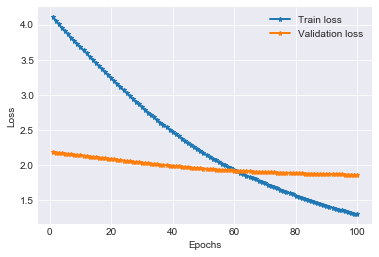

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs_as_list = range(1, len(loss_values) +1)

print(type(epochs_as_list))

plt.style.use('seaborn-darkgrid')

train_loss_line = plt.plot(epochs_as_list, loss_values, label = 'Train loss' )
test_loss_line = plt.plot(epochs_as_list, val_loss_values, label = 'Validation loss' )

plt.setp(train_loss_line, linewidth = 2.0, marker ='*', markersize = 5.0)
plt.setp(test_loss_line, linewidth = 2.0, marker ='*', markersize = 5.0)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

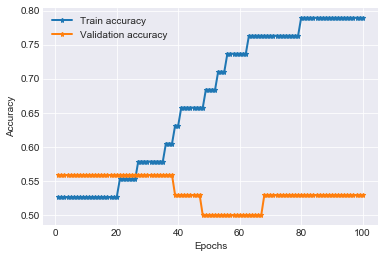

In [38]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

train_acc_line = plt.plot(epochs_as_list, acc_values, label='Train accuracy')
test_acc_line = plt.plot(epochs_as_list, val_acc_values, label='Validation accuracy')

plt.setp(train_acc_line, linewidth = 2.0, marker = '*', markersize =5.0)
plt.setp(test_acc_line, linewidth=2.0, marker= '*', markersize = 5.0)


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()